<a href="https://colab.research.google.com/github/lab30041954/ML_IESE_Course/blob/main/%5BML-05%5D%20Ensemble%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - The prof solution

## Question 1

### Task

Evaluate in dollar terms the predictive performance of the models presented in this example. For instance, you can use the mean (or median) absolute error. 

### Preparation

We start by creating the features matrix `X` and the target vector `y`. The following code chunk has already been used in class. Note that we include the zipcode dummies but no the longitude and latitude in the features matrix.

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'king.csv', index_col=0)
df['price'] = df['price']/1000
y = df['price']
X1 = df.drop(columns=['date', 'zipcode', 'lat', 'long', 'price'])
X2 = pd.get_dummies(df['zipcode'])
X = pd.concat([X1, X2], axis=1)
X = X.values

Let us use first the whole data set and perform the calculations directly, to clarify the methodological issues. 

### Linear regression equation

We train the linear regression model. The prices predicted by this model will be used for its evaluation.

In [2]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, y)
y_lin_pred = lin.predict(X)

Now, the errors are calculated as actual minus predicted, which is the common practice.

In [3]:
lin_error = y - y_lin_pred

We know from the statistical theory that the mean error in a linear regression model is zero, but, as the histogram illustrates, the distribution of the error is positively skewed in this example, which is not a surprise, given the nature of the data. 

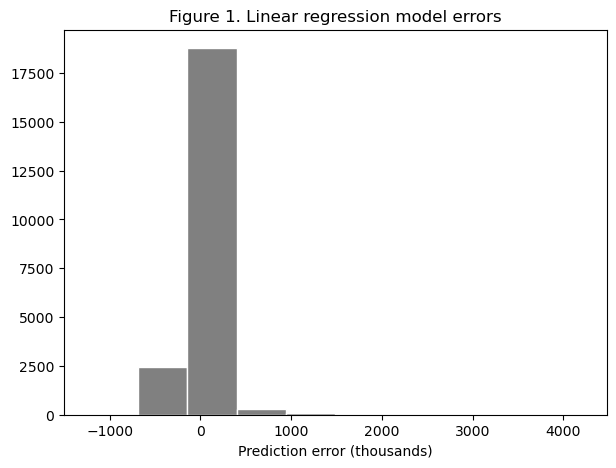

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
plt.title('Figure 1. Linear regression model errors')
plt.hist(lin_error, color='gray', edgecolor='white')
plt.xlabel('Prediction error (thousands)');

The performance of the model can be evaluated in dollar terms with the **mean absolute error**, which the mean of the absolute values of the errors. This gives us 103,100 dollars. 

In [5]:
round(lin_error.abs().mean(), 1)

np.float64(103.1)

Given that we are dealing with a skewed distribution, if would be safer to use the median. As expected, we get a lower value, 70,800 dollars. The interpretation of this figure is clear: the model is wrong by less than this amount in one half of the cases included in the training data.

In [6]:
round(lin_error.abs().median(), 1)

70.8

### Gradient boosting model

We repeat the training exercise with the gradient boosting model.

In [7]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
xgb.fit(X, y)
y_xgb_pred = xgb.predict(X)
xgb_error = y - y_xgb_pred

Next, we explore the distribution of the prediction errors. As could be expected from the scatter plots presented in the lecture, the distribution is less skewed than in Figure 1.

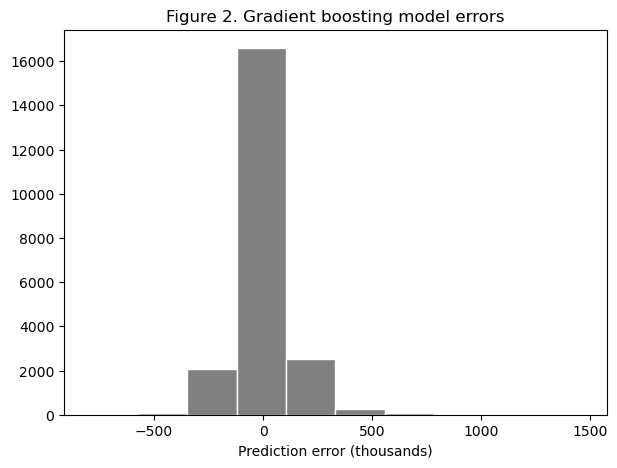

In [8]:
plt.figure(figsize=(7,5))
plt.title('Figure 2. Gradient boosting model errors')
plt.hist(xgb_error, color='gray', edgecolor='white')
plt.xlabel('Prediction error (thousands)');

The mean absolute error is also lower now, 83,800 dollars (this is partly due to overfitting).

In [9]:
round(xgb_error.abs().mean(), 1)

np.float64(83.8)

Finally, the median absolute error is also better for the gradient boosting model.

In [10]:
round(xgb_error.abs().median(), 1)

58.6

## Question 2

### Task

Is it better to use the percentage error in the above assessment?

### Linear regression model

It has already been mentioned that, on average, these predictive models show higher errors for the higher prices. If this is true, we will find a positive correlation between the actual price and the absolute error. This can be easily explored with a scatter plot.

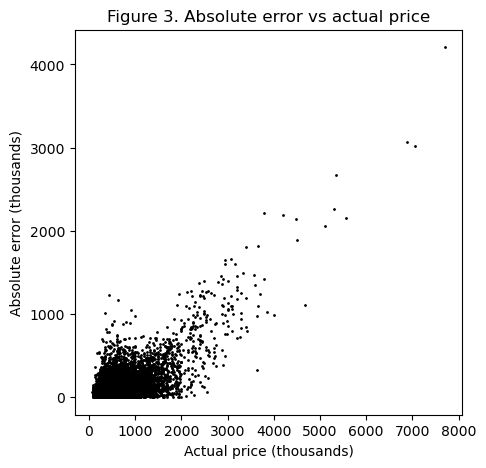

In [11]:
plt.figure(figsize=(5,5))
plt.title('Figure 3. Absolute error vs actual price')
plt.scatter(x=y, y=lin_error.abs(), color='black', s=1)
plt.xlabel('Actual price (thousands)')
plt.ylabel('Absolute error (thousands)');

The scatter plot is easy to read. We can also use the linear correlation coefficient:

In [12]:
y.corr(lin_error.abs()).round(2)

np.float64(0.62)

The **percentage error** is usually suggested for extracting more robust statistics. It can be calculated directly as: 

In [13]:
lin_per_error = lin_error.abs()/y

Though people prefer to use percentages in this context, it has to be noted that the statistical issues don't get fixed so easily. We see in the following scatter plot that, now, some low prices have strong errors.

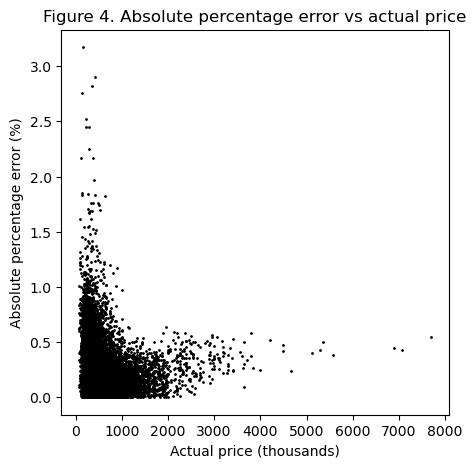

In [14]:
plt.figure(figsize=(5,5))
plt.title('Figure 4. Absolute percentage error vs actual price')
plt.scatter(x=y, y=lin_per_error.abs(), color='black', s=1)
plt.xlabel('Actual price (thousands)')
plt.ylabel('Absolute percentage error (%)');

Since the distribution of the absolute percentage error is also skewed, the median is preferred to the mean. The actual figures are:

In [15]:
round(lin_per_error.abs().mean(), 3)

np.float64(0.208)

In [16]:
round(lin_per_error.abs().median(), 3)

0.155

### Gradient boosting model

We replicate the above calculations for the gradient boosting model, which is also better performing than the linear regression model under this perspective.

In [17]:
xgb_per_error = xgb_error.abs()/y

In [18]:
round(xgb_per_error.abs().mean(), 3)

np.float64(0.177)

In [19]:
round(xgb_per_error.abs().median(), 3)

0.127

## Using scikit-learn functions

Once the basics have been discussed, we can see how to do the job with the scikit-learn toolkit. First, we perform a train/test split to keep track of the overfitting issues.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now, we have scikit-learn functions for the mean absolute error, the median absolute error and the mean absolute percentage error, but not for the median absolute percentage error.

In [21]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

For the linear regression model, our three functions give us:

In [22]:
lin.fit(X_train, y_train)
y_lin_pred_test = lin.predict(X_test)
round(mean_absolute_error(y_test, y_lin_pred_test), 1)

102.0

In [23]:
round(median_absolute_error(y_test, y_lin_pred_test), 3)

72.544

In [24]:
round(mean_absolute_percentage_error(y_test, y_lin_pred_test), 3)

0.212

In [25]:
xgb.fit(X_train, y_train)
y_xgb_pred_test = xgb.predict(X_test)
round(mean_absolute_error(y_test, y_xgb_pred_test), 1)

92.6

In [26]:
round(median_absolute_error(y_test, y_xgb_pred_test), 3)

60.329

In [27]:
round(mean_absolute_percentage_error(y_test, y_xgb_pred_test), 3)

0.187

So, when we control for the overfitting of the gradient boosting by using a test set, this seems to be the best option.